In [42]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

# W czasie sprawdzania Twojego rozwiązania, wartość flagi FINAL_EVALUATION_MODE zostanie zmieniona na True
FINAL_EVALUATION_MODE = False

######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################
import cloudpickle
from sklearn.model_selection import cross_val_score

import os
import random
import math
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score

######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

# Ustawienie ziarna generatora liczb pseudolosowych w celu zapewnienia deterministyczności wyników.
random.seed(42)
np.random.seed(42)

average = 0.49675855513307987
[0.39, 0.404, 0.385, 0.456556]


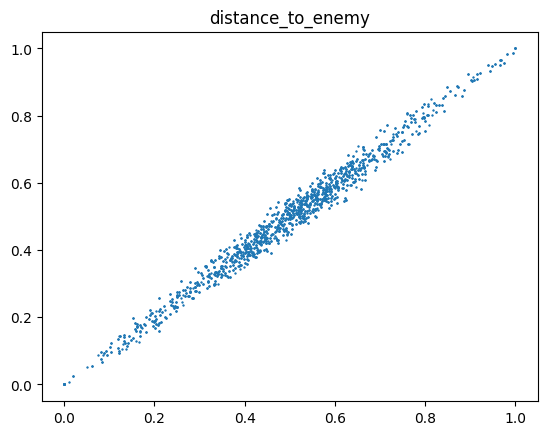

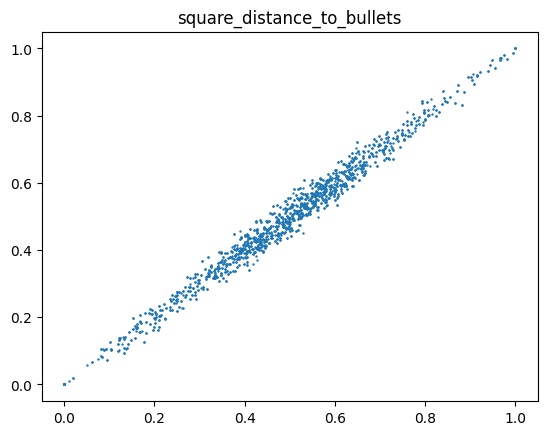

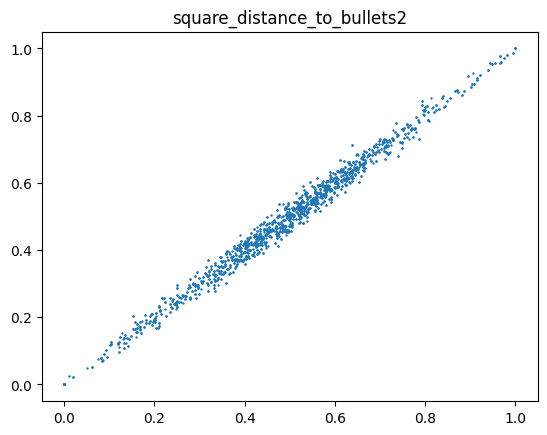

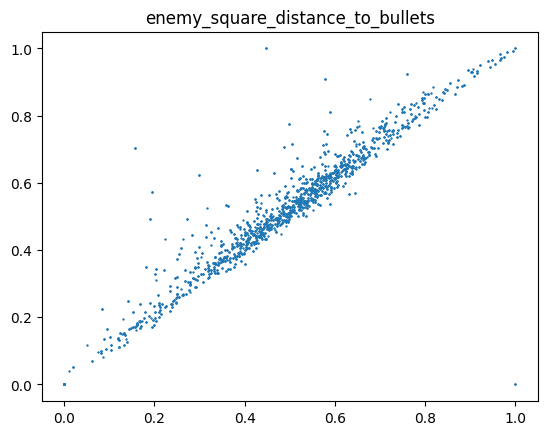

In [43]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

parameters = []
import pickle

with open("features.pkl", "rb") as fp:
    parameters = pickle.load(fp)

x_train = []
y_train = []

x_valid = []
y_valid = []

names = [
    "distance_to_enemy",
    "square_distance_to_bullets",
    "square_distance_to_bullets2",
    "enemy_square_distance_to_bullets",
    "enemy_square_distance_to_bullets2",
    "number_of_bullets",
    "achievable_squares",
    "achievable_squares_enemy",
    "achievable_squares_moving",
    "enemy_achievable_squares_moving",
    "round_number",
    # "weak_monte_carlo_eval",
    # "slightly_stronger_monte_carlo_eval",
    "distance_to_center",
    "enemy_distance_to_center",
]
# subset = [10, 11]

# def get_subset(a, b):
#     r = []
#     for i in b:
#         r.append(a[i])
#     return r

for p in parameters:
    if random.randint(0, 10):
        x_train.append(p[1:])
        y_train.append((p[0]))
    else:
        x_valid.append(p[1:])
        y_valid.append((p[0]))

# print(x_valid)

# "Monte Carlo Eval",

print(f"average = {np.average(y_train)}")

def plot(i):
    t = []

    for p in x_train:
        t.append(p[i])
    plt.plot(y_train, t, "+", linewidth=0.01, markersize=1)
    plt.title(names[i])
    plt.show()

print(x_train[0])
for i in range(len(x_train[0])):
    plot(i)

In [44]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

class ISolution(ABC):
    random_forest: RandomForestRegressor | None = None

    @classmethod
    def create_with_training(cls) -> "ISolution":
        """Metoda służąca do stworzenia rozwiązania z wytrenowanym lasem losowym."""
        solution = cls()

        hyperparameters = cls.get_rf_hyperparameters()
        hyperparameters = cls.validate_hyperparameters(hyperparameters)
        solution.random_forest = RandomForestRegressor(**hyperparameters)

        meta_features = solution.compute_meta_features(x_train)
        solution.random_forest.fit(meta_features, y_train)
        return solution

    @staticmethod
    def validate_hyperparameters(hyperparameters: dict[str, int | float | str]) -> dict[str, int | float | str]:
        """
        Funkcja ta sprawdza, czy hiperparametry lasu losowego są zgodne z wymaganiami zadania. Jeśli nie, to poprawia je na
        domyślne wartości.
        """
        hyperparameters["n_estimators"] = min(hyperparameters.get("n_estimators", 10), 10)
        hyperparameters["max_depth"] = min(hyperparameters.get("max_depth", 10), 10)
        hyperparameters["random_state"] = 42
        return hyperparameters

    @abstractmethod
    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        """
        Funkcja ta powinna dla każdego przykładu ze zbioru $x$ opisanego 150 cechami zwrócić wektor 4 cech, który będzie
        reprezentował ten przykład. Funkcja ta powinna przekształcać wejściową tablicę o rozmiarze (n, 150) na tablicę o
        rozmiarze (n, 4).
        """

        pass

    @staticmethod
    @abstractmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        """
        Funkcja ta powinna zwracać słownik z hiperparametrami lasu losowego. Pamiętaj o ograniczeniach na liczbę drzew i ich
        głębokość!
        """

        pass

In [45]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

def balanced_accuracy_to_score(balanced_accuracy: float) -> float:
    return min(max((balanced_accuracy - 75.) * (100. / (98. - 75.)), 0.), 100.)


def score_solution(solution: ISolution) -> float:
    x, y = x_valid, y_valid
    meta_features = solution.compute_meta_features(x)
    balanced_accuracy = solution.random_forest.score(x_valid, y_valid)

    y_hat = solution.random_forest.predict(x_valid)
    plt.plot(y_hat, y_valid, "+", linewidth=0.01, markersize=2)
    # plt.plot(y_train, t, "+", linewidth=0.01, markersize=2)
    plt.title("score")
    plt.show()

    if not FINAL_EVALUATION_MODE:
        print("Ocena działania modelu: \n")
        print(f"Zbalansowana dokładność klasyfikacji: {balanced_accuracy: .4f}")
    return int(round(balanced_accuracy_to_score(balanced_accuracy)))

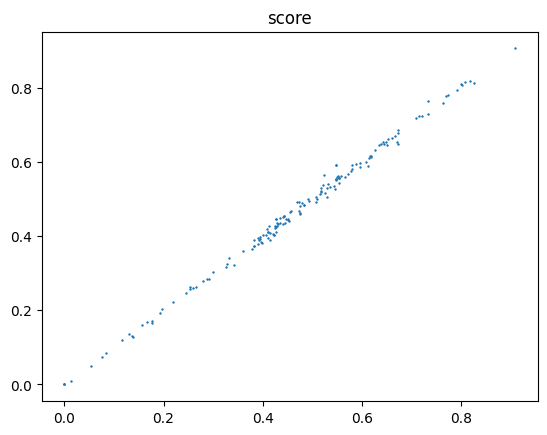

Ocena działania modelu: 

Zbalansowana dokładność klasyfikacji:  0.9962
Score: 0 pkt
[0.50595468 0.07502887 0.41483638 0.00418007]


ValueError: All arrays must be of the same length

In [46]:
import time

class YourSolution(ISolution):
    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        """
        Funkcja ta powinna dla każdego przykładu ze zbioru $x$ opisanego 150 cechami zwrócić wektor 4 cech, który będzie
        reprezentował ten przykład. Funkcja ta powinna transformować wejściową tablicę o rozmiarze (n, 150) na tablicę o
        rozmiarze (n, 4).
        """
        return np.array(x)

    @staticmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        """
        Funkcja ta powinna zwracać słownik z hiperparametrami lasu losowego. Pamiętaj o ograniczeniach na liczbę drzew i ich
        głębokość!
        """
        return {
            "n_estimators": 10,
            "max_depth": 10,
            "random_state": 44,
        }

exemplary_solution = YourSolution.create_with_training()
print(f"Score: {score_solution(exemplary_solution)} pkt")

feature_importance = exemplary_solution.random_forest.feature_importances_
print(feature_importance)
import pandas as pd

# Create a DataFrame to store feature importance data
feature_importance_df = pd.DataFrame(
    {"Feature": names, "Importance": feature_importance}
)

# Sort the DataFrame by Feature Importance values in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
).reset_index(drop=True)

print(feature_importance_df)

In [ ]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################
if FINAL_EVALUATION_MODE:
    your_solution = YourSolution.create_with_training()
    print(f"Ocena: {score_solution(your_solution)} pkt")

    OUTPUT_PATH = "file_output"
    FUNCTION_FILENAME = "your_solution"
    FUNCTION_OUTPUT_PATH = os.path.join(OUTPUT_PATH, FUNCTION_FILENAME)

    if not os.path.exists(OUTPUT_PATH):
        os.makedirs(OUTPUT_PATH)
    
    with open("file_output/your_model.pkl", "wb") as model_out:
        cloudpickle.dump(your_solution, model_out)